# Import Data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')

In [55]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# Visualization

In [56]:
training = np.array(fashion_train_df, dtype = 'float32')

In [57]:
testing = np.array(fashion_test_df, dtype = 'float32')

6.0

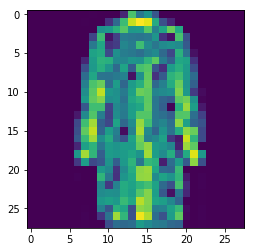

In [176]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

In [ ]:
# Classes
# 0 => T-Shirt
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle Boot

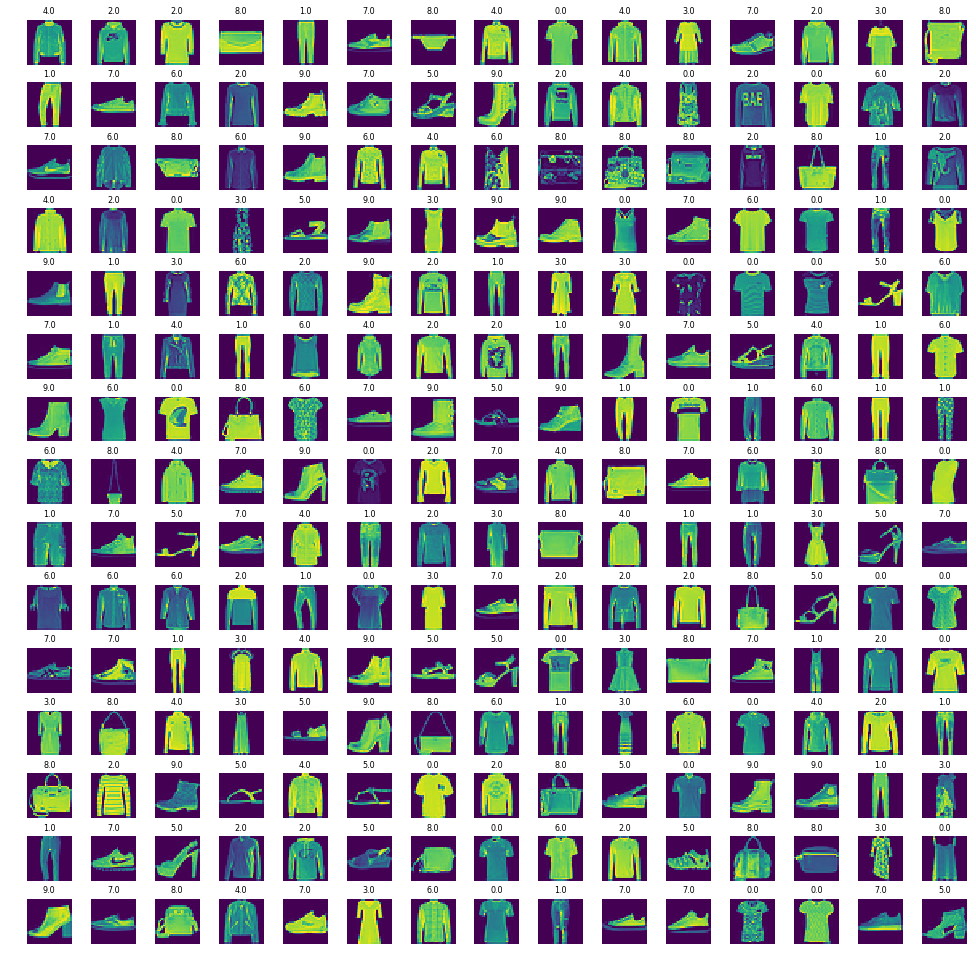

In [75]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # Flatten

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    
    # Random Number
    index = np.random.randint(0, n_training)
    
    # read and display image
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# Train Model

In [85]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [86]:
X_test = training[:, 1:]/255
y_test = training[:, 0]

In [87]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

# Feed Images to CNN

In [102]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [103]:
X_train.shape

(30720, 28, 28, 1)

In [104]:
X_test.shape

(60000, 28, 28, 1)

In [105]:
X_validate.shape

(7680, 28, 28, 1)

# TensorFlow CNN

In [106]:
import keras

Using TensorFlow backend.


In [110]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [135]:
cnn_model = Sequential()

In [136]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

/anaconda3/envs/p37/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [137]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [138]:
cnn_model.add(Flatten())

In [139]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/anaconda3/envs/p37/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [140]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/anaconda3/envs/p37/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [141]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = Adam(lr=0.001),metrics = ['accuracy'])

In [142]:
epochs = 50

In [143]:
cnn_model.fit(X_train,
            y_train,
            batch_size = 512,
            nb_epoch = epochs,
            verbose = 1,
            validation_data = (X_validate, y_validate))

Instructions for updating:
Use tf.cast instead.


/anaconda3/envs/p37/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 30720 samples, validate on 7680 samples
Epoch 1/50
30720/30720 [==============================] - 8s 264us/step - loss: 1.1474 - acc: 0.6231 - val_loss: 0.5785 - val_acc: 0.8009
Epoch 2/50
30720/30720 [==============================] - 8s 263us/step - loss: 0.5326 - acc: 0.8135 - val_loss: 0.4627 - val_acc: 0.8440
Epoch 3/50
30720/30720 [==============================] - 7s 241us/step - loss: 0.4597 - acc: 0.8398 - val_loss: 0.4413 - val_acc: 0.8487
Epoch 4/50
30720/30720 [==============================] - 8s 251us/step - loss: 0.4244 - acc: 0.8525 - val_loss: 0.4022 - val_acc: 0.8681
Epoch 5/50
30720/30720 [==============================] - 8s 249us/step - loss: 0.4005 - acc: 0.8595 - val_loss: 0.3930 - val_acc: 0.8695
Epoch 6/50
30720/30720 [==============================] - 8s 256us/step - loss: 0.3812 - acc: 0.8681 - val_loss: 0.3931 - val_acc: 0.8651
Epoch 7/50
30720/30720 [==============================] - 7s 238us/step - loss: 0.3665 - acc: 0.8732 - val_loss: 0.3687 - v

# Evaluate Model

In [144]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

60000/60000 [==============================] - 4s 72us/step
Test Accuracy : 0.928


In [146]:
predicted_classes = cnn_model.predict_classes(X_test)

In [147]:
predicted_classes

array([2, 9, 6, ..., 8, 8, 7])

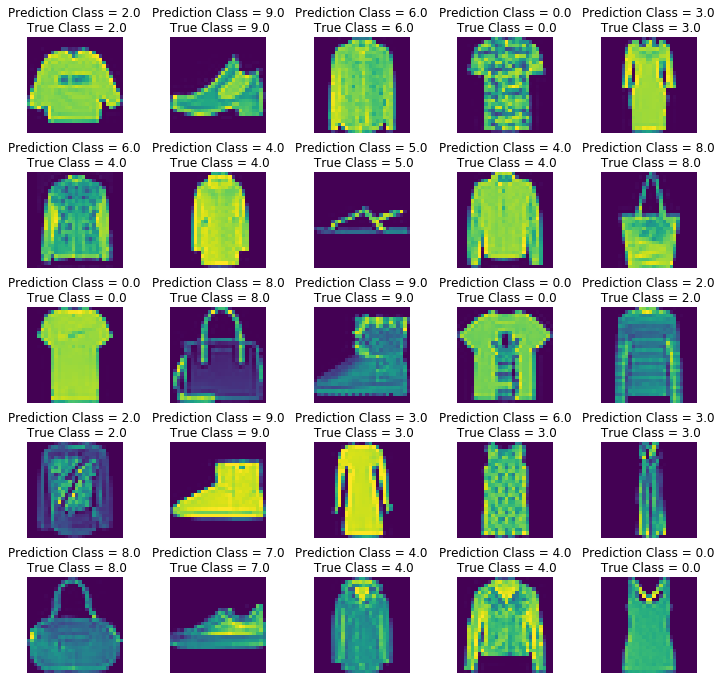

In [152]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # Flatten

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28)) 
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

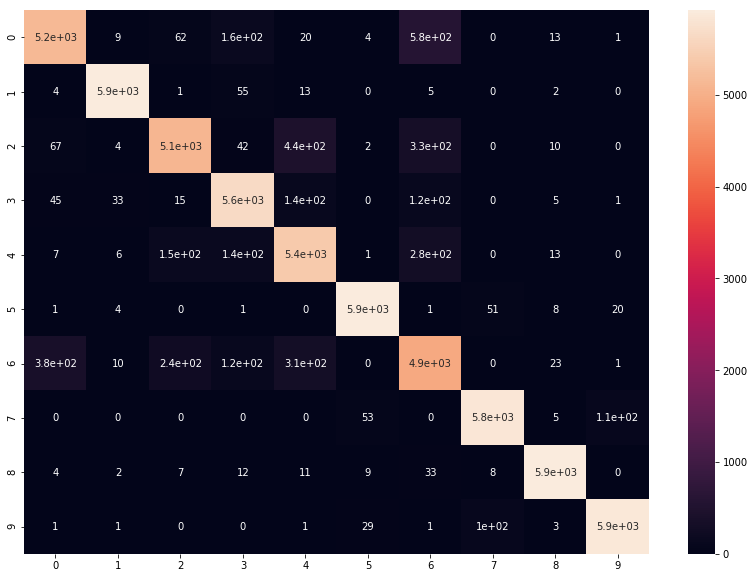

In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [166]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.86      0.88      6000
     Class 1       0.99      0.99      0.99      6000
     Class 2       0.91      0.85      0.88      6000
     Class 3       0.92      0.94      0.93      6000
     Class 4       0.85      0.90      0.88      6000
     Class 5       0.98      0.99      0.98      6000
     Class 6       0.78      0.82      0.80      6000
     Class 7       0.97      0.97      0.97      6000
     Class 8       0.99      0.99      0.99      6000
     Class 9       0.98      0.98      0.98      6000

   micro avg       0.93      0.93      0.93     60000
   macro avg       0.93      0.93      0.93     60000
weighted avg       0.93      0.93      0.93     60000

